___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [465]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [466]:
#pip install folium 

In [467]:
df = pd.read_csv("./Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [468]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [469]:
df.shape

(10000, 14)

In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [471]:
df.isnull().sum().any()

False

In [472]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [473]:
df.columns = map(str.lower, df.columns) # We change column headers all lowercase due to use of easily

### Row_number and CustomerId

In [474]:
# We drop rownumber and customerıd because of that don't impact your model and target and it is redundant for modeling

In [475]:
df = df.drop(['customerid',"rownumber"], axis = 1)

In [476]:
df.head()

,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


### Surname

In [477]:
# We drop surname feature because of that don't impact your model and target

In [478]:
df.surname.value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: surname, Length: 2932, dtype: int64

In [479]:
df.surname.nunique()

2932

In [480]:
df = df.drop("surname", axis = 1)

### Credit Score

In [481]:
df.creditscore.value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: creditscore, Length: 460, dtype: int64

<AxesSubplot:xlabel='creditscore', ylabel='Count'>

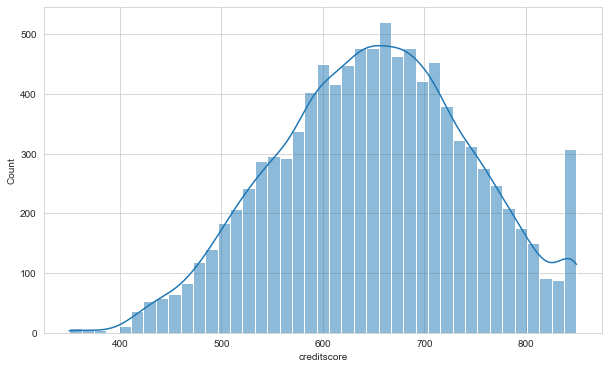

In [482]:
sns.histplot(df.creditscore, kde=True)

<AxesSubplot:xlabel='exited', ylabel='creditscore'>

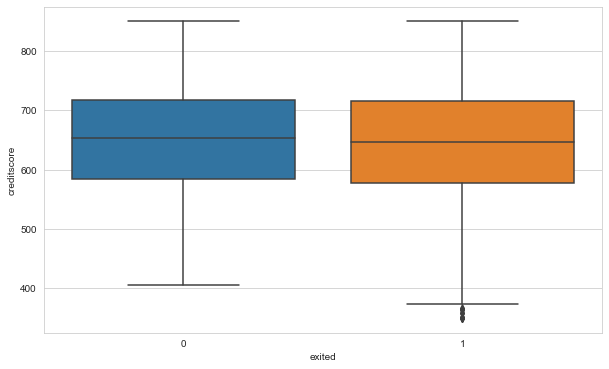

In [483]:
sns.boxplot(x = df.exited, y =df.creditscore)

### Geography

In [484]:
df.geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

<AxesSubplot:xlabel='geography', ylabel='count'>

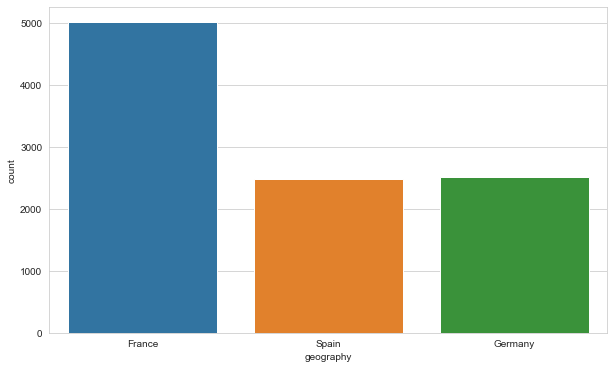

In [485]:
sns.countplot(df["geography"])

In [486]:
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


<AxesSubplot:xlabel='geography', ylabel='count'>

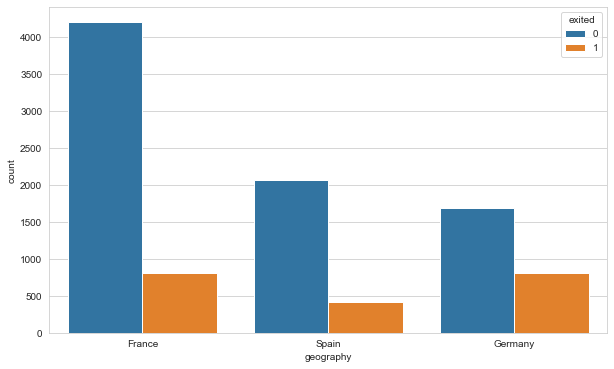

In [487]:
sns.countplot(df["geography"] ,hue=df.exited)

### Gender

In [488]:
df.gender.value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [489]:
# We replace object value with int in gender feature for model transaction (Convert categorical variables to dummy variables)

<AxesSubplot:xlabel='gender', ylabel='count'>

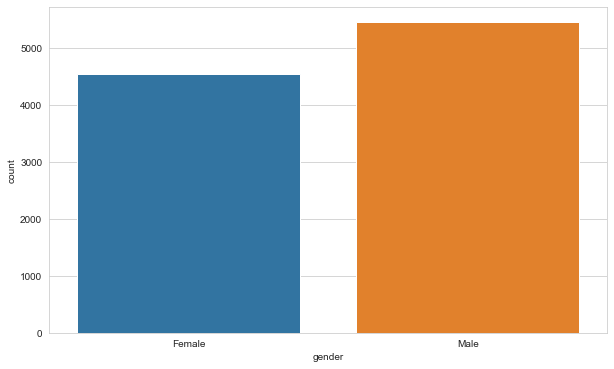

In [490]:
sns.countplot(df["gender"])

In [491]:
df['gender'] = df['gender'].replace(['Female', 'Male'], [0, 1])

<AxesSubplot:xlabel='gender', ylabel='count'>

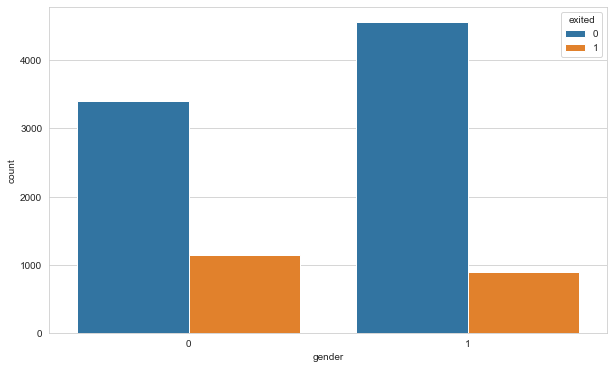

In [492]:
sns.countplot(df["gender"] ,hue=df.exited)

### Age

In [493]:
df.age.value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: age, Length: 70, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

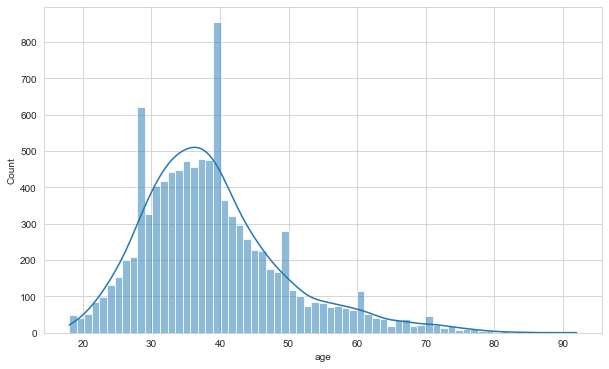

In [494]:
sns.histplot(df.age, kde = True )

<AxesSubplot:xlabel='exited', ylabel='age'>

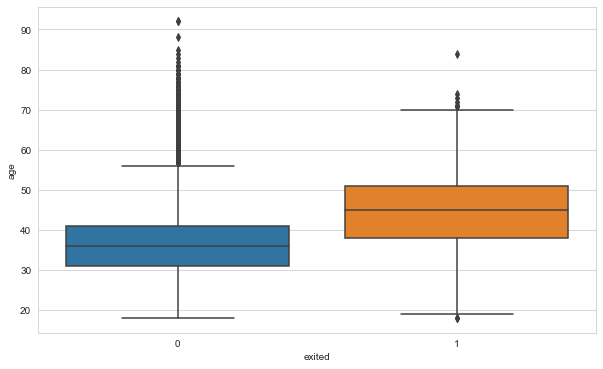

In [495]:
sns.boxplot(x = df.exited, y =df.age)

### Tenure

In [496]:
df.tenure.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: tenure, dtype: int64

<AxesSubplot:xlabel='tenure', ylabel='count'>

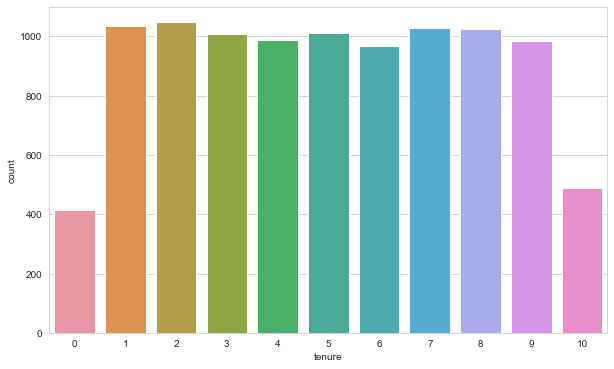

In [497]:
sns.countplot(df.tenure)

<AxesSubplot:xlabel='exited', ylabel='tenure'>

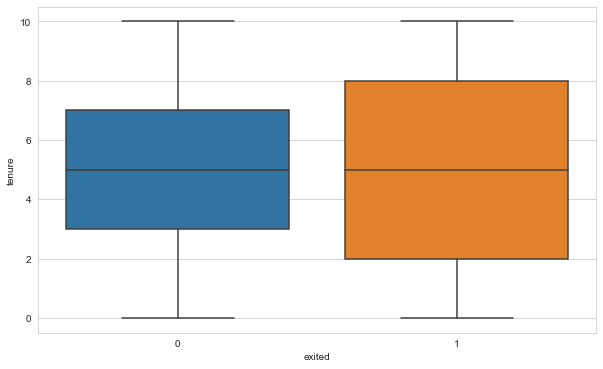

In [498]:
sns.boxplot(x = df.exited, y =df.tenure)

In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  int64  
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 859.5+ KB


### Balance

In [500]:
df.balance.value_counts()

0.000         3617
130170.820       2
105473.740       2
85304.270        1
159397.750       1
              ... 
81556.890        1
112687.690       1
108698.960       1
238387.560       1
130142.790       1
Name: balance, Length: 6382, dtype: int64

In [501]:
df.balance.nunique()

6382

<AxesSubplot:xlabel='balance', ylabel='Count'>

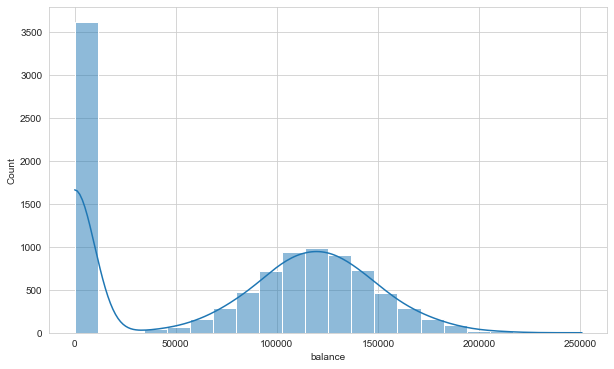

In [502]:
sns.histplot(df.balance, kde = True)

### Numofproducts

In [503]:
df.numofproducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: numofproducts, dtype: int64

<AxesSubplot:xlabel='numofproducts', ylabel='count'>

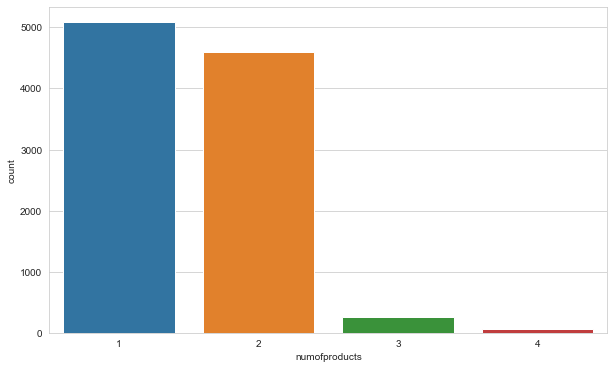

In [504]:
sns.countplot(df.numofproducts)

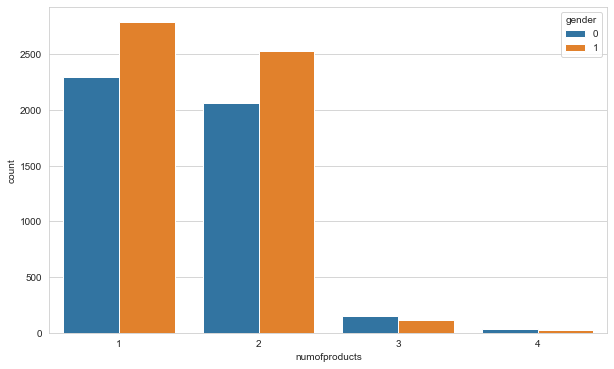

In [505]:
sns.countplot(df.numofproducts, hue = df.gender);

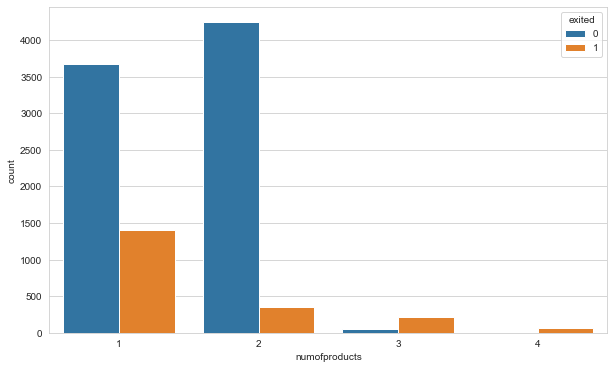

In [506]:
sns.countplot(df.numofproducts, hue = df.exited);

### Hascrcard

In [507]:
df.hascrcard.value_counts()

1    7055
0    2945
Name: hascrcard, dtype: int64

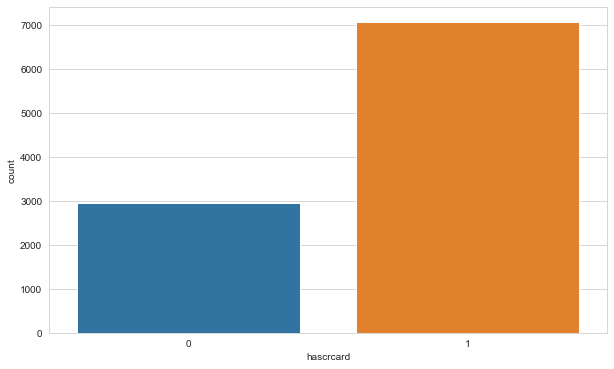

In [508]:
sns.countplot(df.hascrcard);

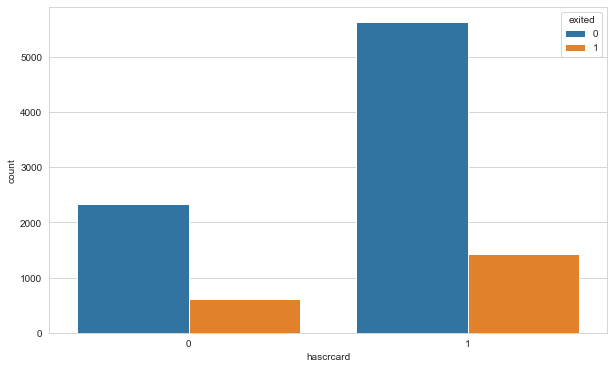

In [509]:
sns.countplot(df.hascrcard, hue = df.exited);

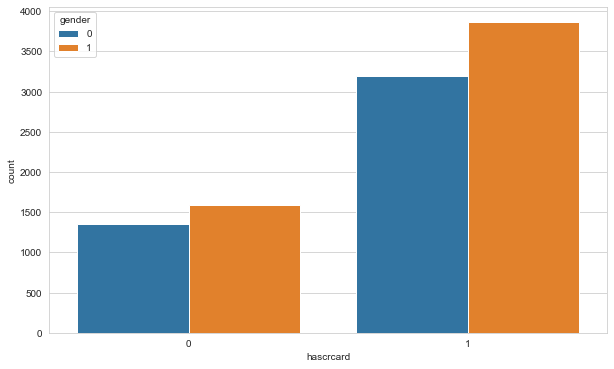

In [510]:
sns.countplot(df.hascrcard, hue = df.gender);

### Is active member

In [511]:
df.isactivemember.value_counts()

1    5151
0    4849
Name: isactivemember, dtype: int64

<AxesSubplot:xlabel='isactivemember', ylabel='count'>

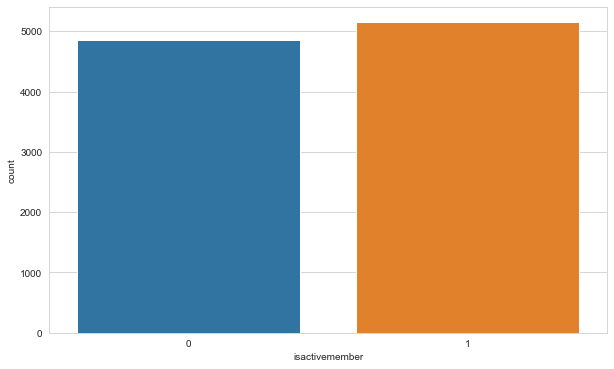

In [512]:
sns.countplot(df.isactivemember)

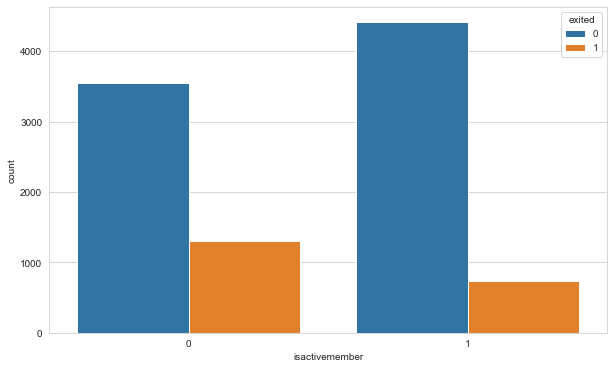

In [513]:
sns.countplot(df.isactivemember, hue = df.exited);

### Estimatedsalary  

In [514]:
df.estimatedsalary.value_counts()

24924.920     2
101348.880    1
55313.440     1
72500.680     1
182692.800    1
             ..
120893.070    1
188377.210    1
55902.930     1
4523.740      1
38190.780     1
Name: estimatedsalary, Length: 9999, dtype: int64

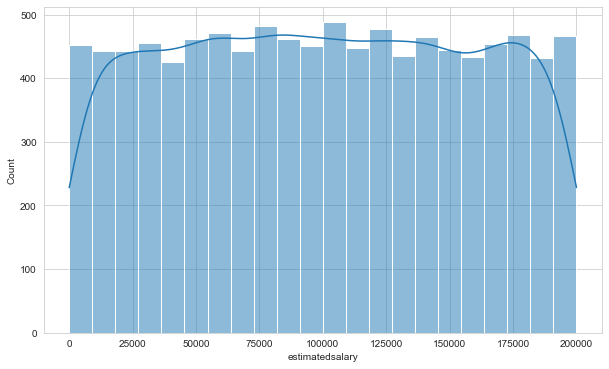

In [515]:
sns.histplot(df.estimatedsalary, kde =True);

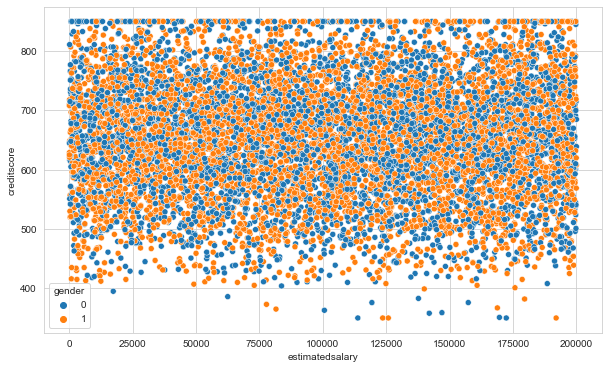

In [516]:
sns.scatterplot(x = df.estimatedsalary, y =df.creditscore, hue =  df. gender);

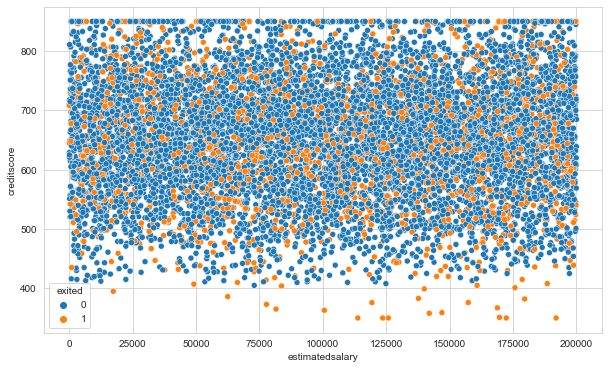

In [517]:
sns.scatterplot(x = df.estimatedsalary, y =df.creditscore, hue =  df. exited);

In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  int64  
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 859.5+ KB


### Exited

In [519]:
df.exited.value_counts()

0    7963
1    2037
Name: exited, dtype: int64

<AxesSubplot:xlabel='exited', ylabel='count'>

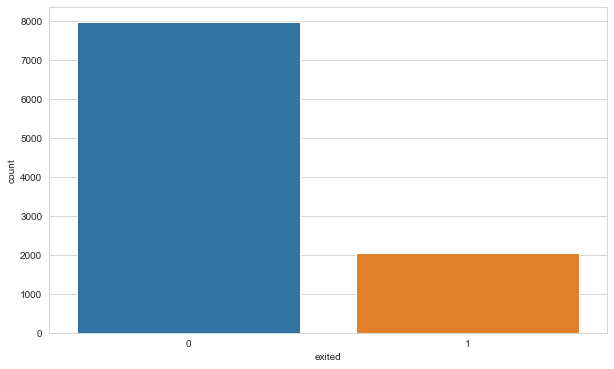

In [520]:
sns.countplot(df.exited)

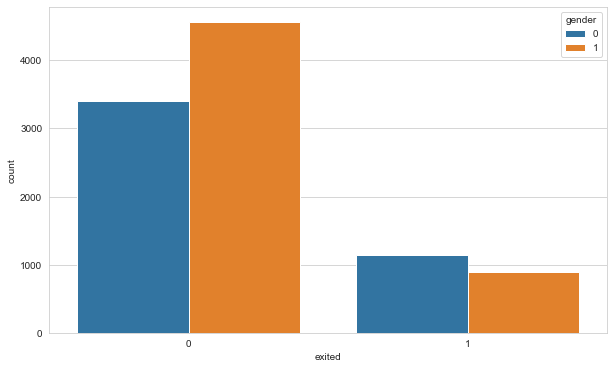

In [521]:
sns.countplot(df.exited, hue = df.gender);

In [522]:
# We replace object value with int in geography feature for model transaction (Convert categorical variables to dummy variables)

In [523]:
df = pd.get_dummies(df, prefix=['geo'],columns=['geography'])

In [524]:
df.head()

,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geo_France,geo_Germany,geo_Spain
0,619,0,42,2,0.000,1,1,1,101348.880,1,1,0,0
1,608,0,41,1,83807.860,1,0,1,112542.580,0,0,0,1
2,502,0,42,8,159660.800,3,1,0,113931.570,1,1,0,0
3,699,0,39,1,0.000,2,0,0,93826.630,0,1,0,0
4,850,0,43,2,125510.820,1,1,1,79084.100,0,0,0,1


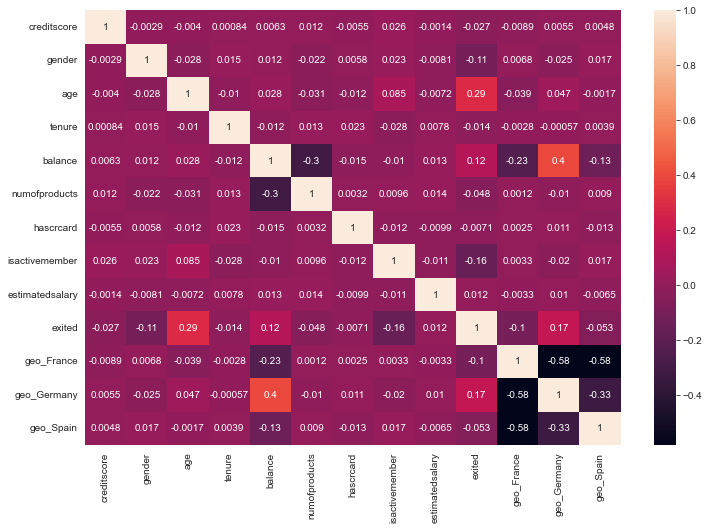

In [525]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True);

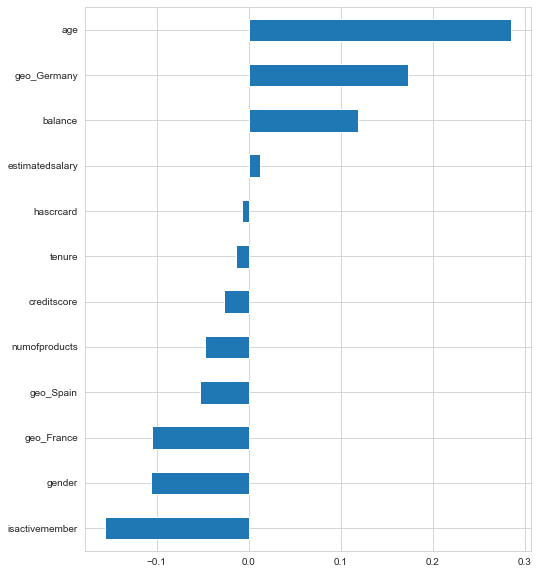

In [526]:
plt.figure(figsize = (8,10))
df.corr()['exited'].sort_values().drop("exited").plot(kind = "barh");

In [527]:
df.shape

(10000, 13)

In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   gender           10000 non-null  int64  
 2   age              10000 non-null  int64  
 3   tenure           10000 non-null  int64  
 4   balance          10000 non-null  float64
 5   numofproducts    10000 non-null  int64  
 6   hascrcard        10000 non-null  int64  
 7   isactivemember   10000 non-null  int64  
 8   estimatedsalary  10000 non-null  float64
 9   exited           10000 non-null  int64  
 10  geo_France       10000 non-null  uint8  
 11  geo_Germany      10000 non-null  uint8  
 12  geo_Spain        10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


# Preprocessing of Data
- Train | Test Split, Scalling

In [553]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [554]:
X = df.drop('exited', axis=1)
y = df['exited']

In [555]:
seed = 42

In [556]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = seed)

In [557]:
scaler = MinMaxScaler()

In [558]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [559]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [560]:
X_train.shape

(8000, 12)

In [561]:
X_test.shape

(2000, 12)

In [562]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [563]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 300, verbose=1)

Epoch 1/300
225/225 [==============================] - 1s 3ms/step - loss: 0.6199 - accuracy: 0.6778 - val_loss: 0.4862 - val_accuracy: 0.8100
Epoch 2/300
225/225 [==============================] - 1s 2ms/step - loss: 0.4851 - accuracy: 0.7956 - val_loss: 0.4590 - val_accuracy: 0.8100
Epoch 3/300
225/225 [==============================] - 1s 2ms/step - loss: 0.4677 - accuracy: 0.7999 - val_loss: 0.4481 - val_accuracy: 0.8037
Epoch 4/300
225/225 [==============================] - 1s 2ms/step - loss: 0.4557 - accuracy: 0.8024 - val_loss: 0.4404 - val_accuracy: 0.8175
Epoch 5/300
225/225 [==============================] - 1s 2ms/step - loss: 0.4458 - accuracy: 0.8051 - val_loss: 0.4282 - val_accuracy: 0.8200
Epoch 6/300
225/225 [==============================] - 1s 2ms/step - loss: 0.4376 - accuracy: 0.8118 - val_loss: 0.4209 - val_accuracy: 0.8175
Epoch 7/300
225/225 [==============================] - 1s 2ms/step - loss: 0.4302 - accuracy: 0.8118 - val_loss: 0.4169 - val_accuracy: 0.8238

Epoch 58/300
225/225 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.8574 - val_loss: 0.3224 - val_accuracy: 0.8675
Epoch 59/300
225/225 [==============================] - 1s 2ms/step - loss: 0.3411 - accuracy: 0.8576 - val_loss: 0.3256 - val_accuracy: 0.8650
Epoch 60/300
225/225 [==============================] - 0s 2ms/step - loss: 0.3418 - accuracy: 0.8576 - val_loss: 0.3175 - val_accuracy: 0.8675
Epoch 61/300
225/225 [==============================] - 1s 3ms/step - loss: 0.3412 - accuracy: 0.8576 - val_loss: 0.3198 - val_accuracy: 0.8687
Epoch 62/300
225/225 [==============================] - 1s 2ms/step - loss: 0.3430 - accuracy: 0.8550 - val_loss: 0.3191 - val_accuracy: 0.8675
Epoch 63/300
225/225 [==============================] - 0s 2ms/step - loss: 0.3413 - accuracy: 0.8561 - val_loss: 0.3202 - val_accuracy: 0.8637
Epoch 64/300
225/225 [==============================] - 1s 2ms/step - loss: 0.3418 - accuracy: 0.8578 - val_loss: 0.3197 - val_accuracy:

Epoch 115/300
225/225 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.8575 - val_loss: 0.3189 - val_accuracy: 0.8650
Epoch 116/300
225/225 [==============================] - 0s 2ms/step - loss: 0.3355 - accuracy: 0.8603 - val_loss: 0.3228 - val_accuracy: 0.8675
Epoch 117/300
225/225 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.8593 - val_loss: 0.3178 - val_accuracy: 0.8662
Epoch 118/300
225/225 [==============================] - 0s 2ms/step - loss: 0.3355 - accuracy: 0.8590 - val_loss: 0.3163 - val_accuracy: 0.8650
Epoch 119/300
225/225 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.8583 - val_loss: 0.3161 - val_accuracy: 0.8662
Epoch 120/300
225/225 [==============================] - 0s 2ms/step - loss: 0.3353 - accuracy: 0.8600 - val_loss: 0.3180 - val_accuracy: 0.8637
Epoch 121/300
225/225 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.8596 - val_loss: 0.3224 - val_ac

225/225 [==============================] - 1s 4ms/step - loss: 0.3327 - accuracy: 0.8619 - val_loss: 0.3147 - val_accuracy: 0.8687
Epoch 172/300
225/225 [==============================] - 1s 3ms/step - loss: 0.3322 - accuracy: 0.8607 - val_loss: 0.3141 - val_accuracy: 0.8662
Epoch 173/300
225/225 [==============================] - 1s 4ms/step - loss: 0.3318 - accuracy: 0.8608 - val_loss: 0.3125 - val_accuracy: 0.8675
Epoch 174/300
225/225 [==============================] - 1s 5ms/step - loss: 0.3311 - accuracy: 0.8625 - val_loss: 0.3149 - val_accuracy: 0.8662
Epoch 175/300
225/225 [==============================] - 1s 4ms/step - loss: 0.3316 - accuracy: 0.8631 - val_loss: 0.3180 - val_accuracy: 0.8675
Epoch 176/300
225/225 [==============================] - 1s 4ms/step - loss: 0.3320 - accuracy: 0.8615 - val_loss: 0.3168 - val_accuracy: 0.8700
Epoch 177/300
225/225 [==============================] - 1s 4ms/step - loss: 0.3314 - accuracy: 0.8651 - val_loss: 0.3166 - val_accuracy: 0.8687

225/225 [==============================] - 1s 3ms/step - loss: 0.3289 - accuracy: 0.8624 - val_loss: 0.3195 - val_accuracy: 0.8712
Epoch 228/300
225/225 [==============================] - 1s 2ms/step - loss: 0.3291 - accuracy: 0.8637 - val_loss: 0.3170 - val_accuracy: 0.8675
Epoch 229/300
225/225 [==============================] - 1s 2ms/step - loss: 0.3282 - accuracy: 0.8640 - val_loss: 0.3124 - val_accuracy: 0.8737
Epoch 230/300
225/225 [==============================] - 0s 2ms/step - loss: 0.3289 - accuracy: 0.8635 - val_loss: 0.3161 - val_accuracy: 0.8687
Epoch 231/300
225/225 [==============================] - 0s 2ms/step - loss: 0.3283 - accuracy: 0.8621 - val_loss: 0.3185 - val_accuracy: 0.8687
Epoch 232/300
225/225 [==============================] - 1s 2ms/step - loss: 0.3287 - accuracy: 0.8626 - val_loss: 0.3174 - val_accuracy: 0.8712
Epoch 233/300
225/225 [==============================] - 1s 2ms/step - loss: 0.3281 - accuracy: 0.8600 - val_loss: 0.3156 - val_accuracy: 0.8725

225/225 [==============================] - 1s 3ms/step - loss: 0.3262 - accuracy: 0.8632 - val_loss: 0.3212 - val_accuracy: 0.8737
Epoch 284/300
225/225 [==============================] - 1s 3ms/step - loss: 0.3269 - accuracy: 0.8640 - val_loss: 0.3188 - val_accuracy: 0.8788
Epoch 285/300
225/225 [==============================] - 1s 3ms/step - loss: 0.3260 - accuracy: 0.8642 - val_loss: 0.3218 - val_accuracy: 0.8662
Epoch 286/300
225/225 [==============================] - 1s 3ms/step - loss: 0.3281 - accuracy: 0.8640 - val_loss: 0.3191 - val_accuracy: 0.8712
Epoch 287/300
225/225 [==============================] - 1s 3ms/step - loss: 0.3259 - accuracy: 0.8622 - val_loss: 0.3200 - val_accuracy: 0.8737
Epoch 288/300
225/225 [==============================] - 1s 3ms/step - loss: 0.3260 - accuracy: 0.8639 - val_loss: 0.3189 - val_accuracy: 0.8700
Epoch 289/300
225/225 [==============================] - 1s 3ms/step - loss: 0.3259 - accuracy: 0.8649 - val_loss: 0.3160 - val_accuracy: 0.8763

In [564]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 18)                234       
                                                                 
 dense_38 (Dense)            (None, 9)                 171       
                                                                 
 dense_39 (Dense)            (None, 1)                 10        
                                                                 
Total params: 415
Trainable params: 415
Non-trainable params: 0
_________________________________________________________________


In [565]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.620,0.678,0.486,0.810
1,0.485,0.796,0.459,0.810
2,0.468,0.800,0.448,0.804
3,0.456,0.802,0.440,0.817
4,0.446,0.805,0.428,0.820


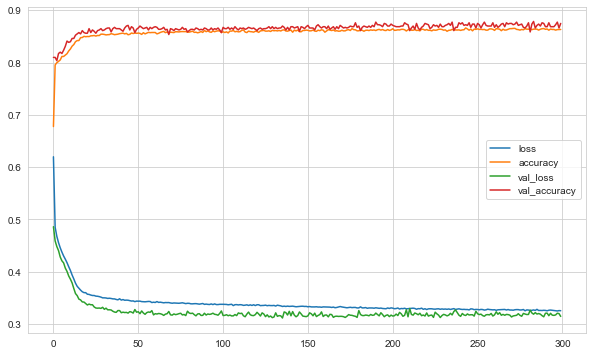

In [566]:
loss_df.plot();

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [567]:
model.evaluate(X_test, y_test, verbose=0)

[0.34577855467796326, 0.8604999780654907]

In [568]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.34577855467796326
accuracy :  0.8604999780654907


In [570]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1540   53]
 [ 226  181]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.44      0.56       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

### Add Dropout Layer

### Add Early Stop

#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

## GridSearchCV

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___